In [15]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import os
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use("ggplot")
berry_1 = pd.read_csv("C:/Users/user/Desktop/빅콘테스트/0918_eda_one_hot.csv")

In [16]:
berry_1

,STRG_DT,FRST_TREE_CNT,PFBS_NTRO_CBDX_CTRN,SPL_TPRT_1,HTNG_TPRT_1,SPL_TPRT_2,AVE_INNER_HMDT_1_2,SKLT_OPDR_RATE_1_RIGHT,GDD,cluster_1,cluster_2,cluster_3
0,2022-01-01 0:00,5.0,456,30.6,9.0,10.0,92.0,0,0.109357,1,0,0
1,2022-01-01 0:10,5.0,459,37.2,9.0,10.3,92.0,0,0.109357,1,0,0
2,2022-01-01 0:20,5.0,468,34.8,9.0,10.5,90.2,0,0.109357,1,0,0
3,2022-01-01 0:30,5.0,466,33.6,9.0,10.4,91.4,0,0.109357,1,0,0
4,2022-01-01 0:40,5.0,467,33.4,9.0,10.1,95.1,0,0.109357,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
26059,2022-06-30 23:10,0.5,421,25.6,0.0,29.6,91.1,40,-0.877973,0,0,1
26060,2022-06-30 23:20,0.5,421,25.6,0.0,29.6,91.5,40,-0.877973,0,0,1
26061,2022-06-30 23:30,0.5,423,25.7,0.0,29.6,91.8,40,-0.877973,0,0,1
26062,2022-06-30 23:40,0.5,427,25.6,0.0,29.6,92.2,40,-0.877973,0,0,1


In [17]:
x= berry_1.drop(["FRST_TREE_CNT","cluster_1","cluster_2","cluster_3"],axis=1)
y_1= berry_1["FRST_TREE_CNT"]
y_pd=pd.DataFrame(y_1)
df_copy = x.copy()
df_copy['STRG_DT'] = pd.to_datetime(df_copy['STRG_DT'])
# 'Date' 열을 인덱스로 설정
df_copy.set_index('STRG_DT', inplace=True)

#standard scaler
scaler = StandardScaler()
y_0= scaler.fit_transform(y_pd.values)

# 데이터프레임의 모든 열에 Z-Score 정규화 적용
normalized_df = scaler.fit_transform(df_copy)

# 정규화된 데이터를 다시 데이터프레임으로 변환
normalized_df = pd.DataFrame(normalized_df, columns=df_copy.columns)

#모델에 넣을 데이터에 원핫인코딩 데이터 추가
normalized_df["cluster_3"] = berry_1["cluster_3"]
normalized_df["cluster_2"] = berry_1["cluster_2"]
normalized_df["cluster_1"] = berry_1["cluster_1"]



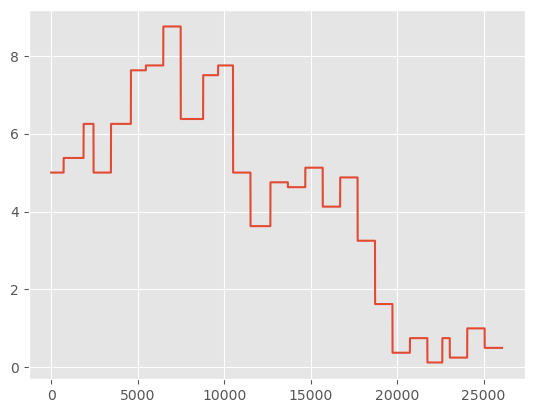

In [18]:
plt.plot(y_1)
#나중에 x축


In [19]:
#stat

In [20]:
y_0

array([[ 0.27842113],
       [ 0.27842113],
       [ 0.27842113],
       ...,
       [-1.45102795],
       [-1.45102795],
       [-1.45102795]])

In [21]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error


# 데이터 불러오기

#모델에 넣을 데이터(조금만 코드달라지고 위와 같음)
x= normalized_df
y= y_0[:,0]


x["target"]=y 


# 모델 초기화
model = sm.OLS.from_formula('target ~ PFBS_NTRO_CBDX_CTRN +SPL_TPRT_1+ HTNG_TPRT_1+ SPL_TPRT_2 + AVE_INNER_HMDT_1_2+ SKLT_OPDR_RATE_1_RIGHT+GDD +cluster_1+ cluster_2+cluster_3', x)


result = model.fit()
y_pred = result.predict(x.drop("target",axis=1))

# 테스트 데이터에 대한 예측을 역정규화
scaler = StandardScaler()  # 스케일러 초기화 (이때, 적절한 초기화 방법을 사용하여 정의)
scaler.fit(x["target"].values.reshape(-1, 1))  # y_train 데이터를 기반으로 스케일러를 초기화하고, 반드시 2D 배열로 변환해야 함

y_pred_inverse = scaler.inverse_transform(y_pred.values.reshape(-1,1))# 역정규화 수행
y_origin_inverse= scaler.inverse_transform(y.reshape(-1,1))


rmse = np.sqrt(mean_squared_error(y_pred_inverse,y_origin_inverse))
print("RMSE:", rmse)

# 회귀 계수 출력
print('회귀 계수:')
print(result.params)


RMSE: 0.3940837709876492
회귀 계수:
Intercept                -0.054064
PFBS_NTRO_CBDX_CTRN      -0.073116
SPL_TPRT_1               -0.099087
HTNG_TPRT_1               0.070408
SPL_TPRT_2                0.076035
AVE_INNER_HMDT_1_2        0.002348
SKLT_OPDR_RATE_1_RIGHT   -0.030750
GDD                      -0.016859
cluster_1                 0.918045
cluster_2                 0.232049
cluster_3                -1.204158
dtype: float64


In [22]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                 1.575e+04
Date:                Tue, 26 Sep 2023   Prob (F-statistic):               0.00
Time:                        20:49:42   Log-Likelihood:                -12713.
No. Observations:               26064   AIC:                         2.545e+04
Df Residuals:                   26054   BIC:                         2.553e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -0.0541      0.002    -29.178      0.000      -0.058      -0.050
PFBS_NTRO_CBDX_CTRN       -0.0731      0.003    -24.727      0.000      -0.079      -0.067
SPL_TPRT_1                -0.0991      0.003    -33.469      0.000      -0.105      -0.093
HTNG_TPRT_1                0.0704      0.004     16.418      0.000       0.062       0.079
SPL_TPRT_2                 0.0760      0.003     27.354      0.000       0.071       0.081
AVE_INNER_HMDT_1_2         0.0023      0.003      0.705      0.481      -0.004       0.009
SKLT_OPDR_RATE_1_RIGHT    -0.0308      0.004     -8.740      0.000      -0.038      -0.024
GDD                       -0.0169      0.003     -6.404      0.000      -0.022      -0.012
cluster_1                  0.9180      0.005    170.632      0.000       0.907       0.929
cluster_2                  0.2320      0.004     51.722      0.000       0.223       0.241
cluster_3                 -1.2042      0.006   -189.938      0.000      -1.217      -1.192
==============================================================================
Omnibus:                     3247.215   Durbin-Watson:                   0.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4864.756
Skew:                           0.917   Prob(JB):                         0.00
Kurtosis:                       4.058   Cond. No.                     1.83e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.62e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

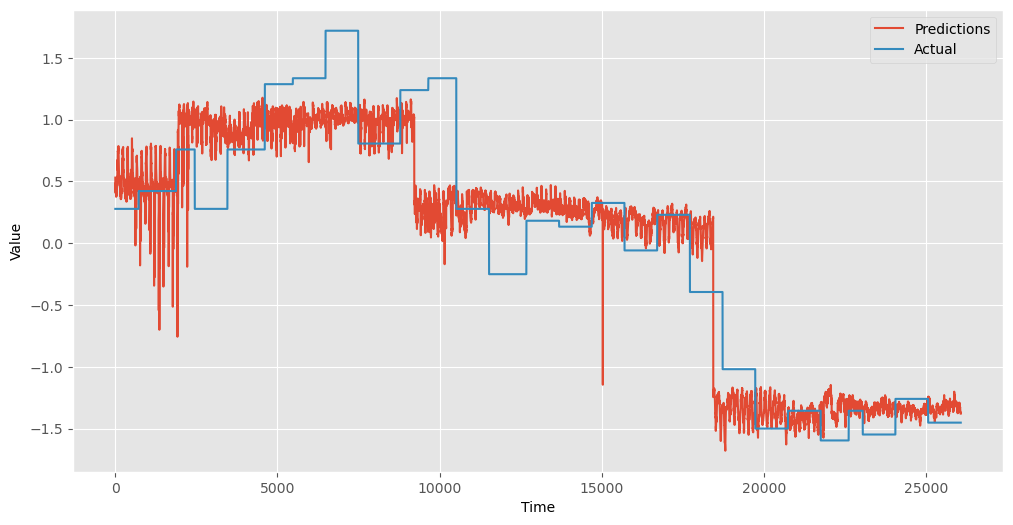

In [23]:

# 예측값과 실제값 시각화
plt.figure(figsize=(12, 6))
plt.plot( y_pred_inverse, label='Predictions')
plt.plot(y_origin_inverse, label='Actual')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


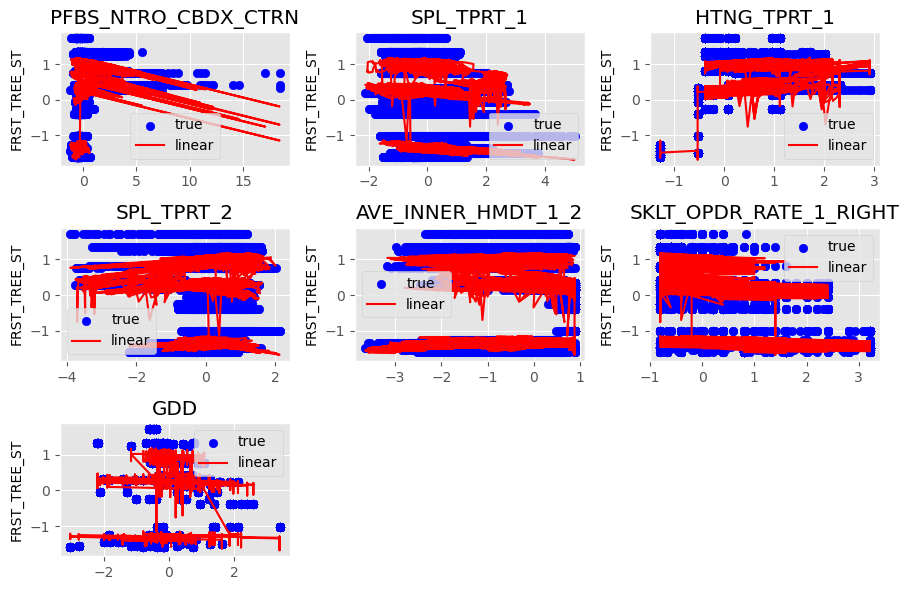

In [24]:
fig, axs = plt.subplots(3, 3, figsize=(9, 6))  # 4행 3열의 서브플롯 생성

# 각 서브플롯에 원하는 타이틀 설정
feature_names = ['PFBS_NTRO_CBDX_CTRN', 'SPL_TPRT_1', 'HTNG_TPRT_1', 'SPL_TPRT_2', 
                 'AVE_INNER_HMDT_1_2', 'SKLT_OPDR_RATE_1_RIGHT', 'GDD']

for i, ax in list(enumerate(axs.ravel()))[:-2]:  # 마지막 행의 2번째와 3번째 열은 제외
    XX = x.drop("target",axis=1).iloc[:,i]
    ax.scatter(XX,y_origin_inverse, color='blue', label='true')
    ax.plot(XX, y_pred_inverse, color='red', label="linear")
    
    ax.set_ylabel('FRST_TREE_ST')
    ax.set_title(f'{feature_names[i]}')  # 원하는 타이틀로 설정
    ax.legend()
# 마지막 행의 2번째와 3번째 열 서브플롯은 비워둡니다.
axs[2, 1].axis('off')
axs[2, 2].axis('off')

plt.tight_layout()
plt.show()

In [25]:
def daily_mean(y_pred, y_test):
    #예측값과 test 값을 일별로 평균내기
    df = pd.read_csv('C:/Users/user/Desktop/빅콘테스트/0916 착과수 최종.csv')
    new_df = pd.DataFrame()
    
    split_ratio = 0
    split_index = int(len(df) * split_ratio)

    new_df['STRG_DT'] = df.iloc[split_index:, :]['STRG_DT']
    new_df['y_test'] = y_test
    new_df['y_pred'] = y_pred

    new_df['STRG_DT'] = pd.to_datetime(new_df['STRG_DT'])


    # 'STRG_DT' 열을 인덱스로 설정
    new_df.set_index('STRG_DT', inplace=True)

    # 날짜별로 그룹화하고 평균을 계산
    daily_mean = new_df.groupby(new_df.index.date).mean()


    #역정규화
    from sklearn.preprocessing import StandardScaler

    scaler = StandardScaler()
    scaled_data = df['FRST_TREE_CNT'].values.reshape(-1, 1)  # 1D 데이터를 2D로 변환
    scaler.fit(scaled_data)

    # 이미 정규화된 y_pred 값을 역으로 변환합니다.
    daily_mean['y_pred'] = scaler.inverse_transform(np.array(daily_mean['y_pred']).reshape(-1,1))
    daily_mean['y_test'] = scaler.inverse_transform(np.array(daily_mean['y_test']).reshape(-1,1))
    #오차 계산
    daily_mean['error'] = daily_mean['y_test'] - daily_mean['y_pred']

    #그래프 계산
    plt.figure(figsize=(10,5))
    plt.plot(np.array(daily_mean['y_pred']),label = "pred")
    plt.plot(np.array(daily_mean['y_test']),label = "true")
    plt.legend()
    plt.show()


    #score 계산
    from sklearn.metrics import mean_squared_error, r2_score

    # RMSE 계산
    rmse = np.sqrt(mean_squared_error(daily_mean['y_test'], daily_mean['y_pred']))

    # R^2 계산
    r_squared = r2_score(daily_mean['y_test'], daily_mean['y_pred'])

    # RMSE와 R^2 값을 리스트로 반환
    score = [rmse, r_squared]
    return daily_mean ,score

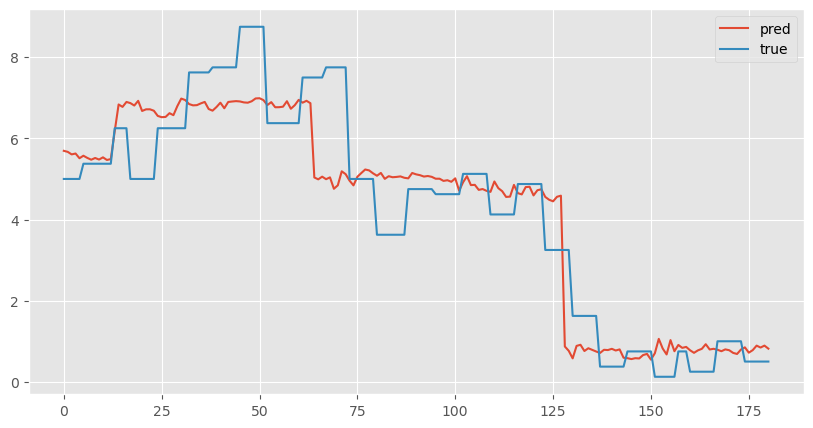

(            y_test    y_pred     error
 2022-01-01     5.0  5.692792 -0.692792
 2022-01-02     5.0  5.667598 -0.667598
 2022-01-03     5.0  5.605146 -0.605146
 2022-01-04     5.0  5.626593 -0.626593
 2022-01-05     5.0  5.510521 -0.510521
 ...            ...       ...       ...
 2022-06-26     0.5  0.781236 -0.281236
 2022-06-27     0.5  0.892702 -0.392702
 2022-06-28     0.5  0.845124 -0.345124
 2022-06-29     0.5  0.892860 -0.392860
 2022-06-30     0.5  0.818154 -0.318154
 
 [181 rows x 3 columns],
 [1.0020033656828777, 0.8517041867924632])

In [26]:
daily_mean(y_pred,x["target"])

In [27]:
len(y_pred)

26064

# 시간 변수 없애고 함.


In [28]:
y_0

array([[ 0.27842113],
       [ 0.27842113],
       [ 0.27842113],
       ...,
       [-1.45102795],
       [-1.45102795],
       [-1.45102795]])

In [29]:

# 데이터 불러오기

#모델에 넣을 데이터(조금만 코드달라지고 위와 같음)
x= normalized_df.drop(["cluster_1","cluster_2","cluster_3"],axis=1)
y= y_0[:,0]


x["target"]=y 


# 모델 초기화
model = sm.OLS.from_formula('target ~ PFBS_NTRO_CBDX_CTRN +SPL_TPRT_1+ HTNG_TPRT_1+ SPL_TPRT_2 + AVE_INNER_HMDT_1_2+ SKLT_OPDR_RATE_1_RIGHT+GDD ', x)


result = model.fit()
y_pred = result.predict(x.drop("target",axis=1))

# 테스트 데이터에 대한 예측을 역정규화
scaler = StandardScaler()  # 스케일러 초기화 (이때, 적절한 초기화 방법을 사용하여 정의)
scaler.fit(x["target"].values.reshape(-1, 1))  # y_train 데이터를 기반으로 스케일러를 초기화하고, 반드시 2D 배열로 변환해야 함

y_pred_inverse = scaler.inverse_transform(y_pred.values.reshape(-1,1))# 역정규화 수행
y_origin_inverse= scaler.inverse_transform(y.reshape(-1,1))


rmse = np.sqrt(mean_squared_error(y_pred_inverse,y_origin_inverse))
print("RMSE:", rmse)

# 회귀 계수 출력
print('회귀 계수:')
print(result.params)

RMSE: 0.6239442263854483
회귀 계수:
Intercept                -1.901257e-15
PFBS_NTRO_CBDX_CTRN      -4.019640e-02
SPL_TPRT_1               -1.449800e-01
HTNG_TPRT_1               5.951851e-01
SPL_TPRT_2                3.350061e-02
AVE_INNER_HMDT_1_2        9.696119e-02
SKLT_OPDR_RATE_1_RIGHT   -2.798805e-01
GDD                       8.556526e-03
dtype: float64


In [30]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     5839.
Date:                Tue, 26 Sep 2023   Prob (F-statistic):               0.00
Time:                        20:49:55   Log-Likelihood:                -24689.
No. Observations:               26064   AIC:                         4.939e+04
Df Residuals:                   26056   BIC:                         4.946e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -1.901e-15      0.004  -4.92e-13      1.000      -0.008       0.008
PFBS_NTRO_CBDX_CTRN       -0.0402      0.005     -8.881      0.000      -0.049      -0.031
SPL_TPRT_1                -0.1450      0.005    -31.029      0.000      -0.154      -0.136
HTNG_TPRT_1                0.5952      0.005    112.353      0.000       0.585       0.606
SPL_TPRT_2                 0.0335      0.004      7.731      0.000       0.025       0.042
AVE_INNER_HMDT_1_2         0.0970      0.004     22.164      0.000       0.088       0.106
SKLT_OPDR_RATE_1_RIGHT    -0.2799      0.005    -54.080      0.000      -0.290      -0.270
GDD                        0.0086      0.004      2.059      0.040       0.000       0.017
==============================================================================
Omnibus:                      412.044   Durbin-Watson:                   0.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              275.632
Skew:                           0.128   Prob(JB):                     1.40e-60
Kurtosis:                       2.566   Cond. No.                         2.59
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

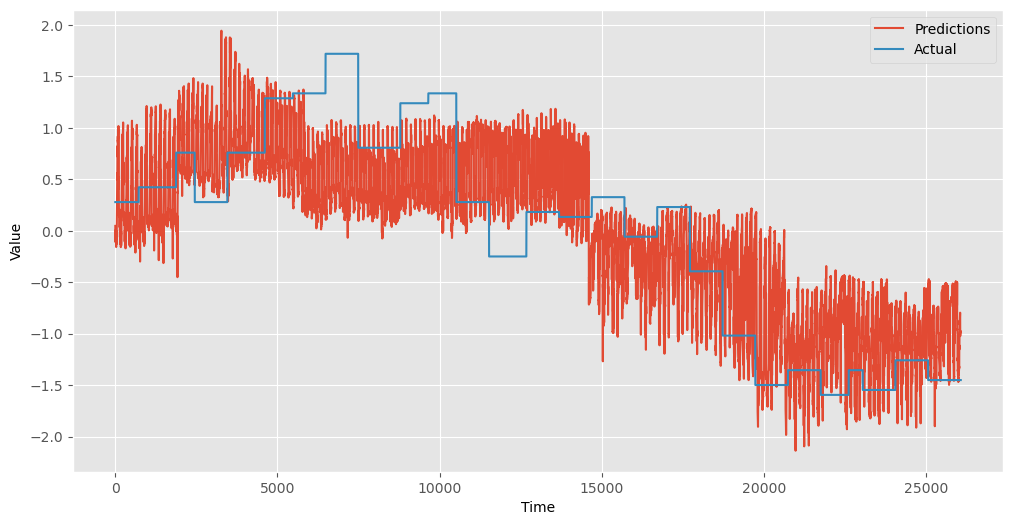

In [31]:

# 예측값과 실제값 시각화
plt.figure(figsize=(12, 6))
plt.plot( y_pred_inverse, label='Predictions')
plt.plot(y_origin_inverse, label='Actual')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


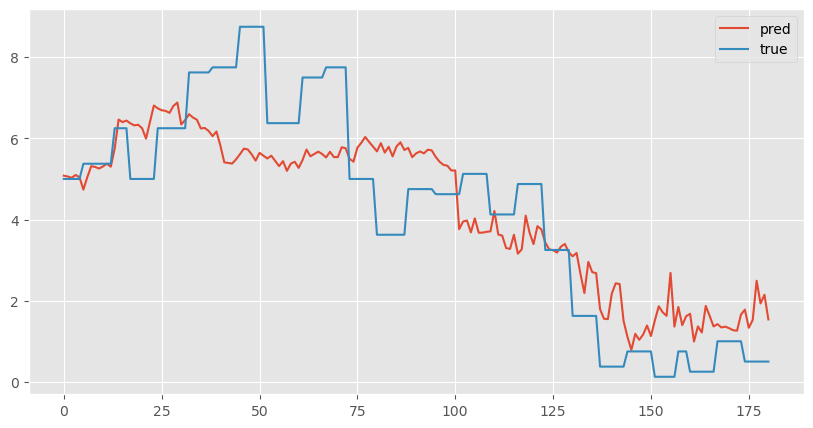

(            y_test    y_pred     error
 2022-01-01     5.0  5.080978 -0.080978
 2022-01-02     5.0  5.060488 -0.060488
 2022-01-03     5.0  5.028267 -0.028267
 2022-01-04     5.0  5.097120 -0.097120
 2022-01-05     5.0  5.043264 -0.043264
 ...            ...       ...       ...
 2022-06-26     0.5  1.525728 -1.025728
 2022-06-27     0.5  2.491209 -1.991209
 2022-06-28     0.5  1.931810 -1.431810
 2022-06-29     0.5  2.147082 -1.647082
 2022-06-30     0.5  1.538581 -1.038581
 
 [181 rows x 3 columns],
 [1.3554515011282628, 0.7286320867626386])

In [32]:
daily_mean(y_pred,x["target"])